# Radix Sort: Corner Cases

In [1]:
# global imports
from time import time
import numpy as np
import matplotlib.pyplot as plt

## Radix Sort Function

In [2]:
# radix sort function
def radixSort(arr):
    '''sorts an array of integers from smallest to largest'''
    max1 = max(arr)
    exp = 1
    while max1//exp > 0:
        countingSort(arr, exp)
        exp *= 10

# counting sort function
def countingSort(arr, exp1):
    '''sorts an array of integers from the smallest to largest ith digit place'''
    n = len(arr)
    sortedArr = [0] * n
    countArr = [0] * 10
    for i in range(0, n):
        index = arr[i]//exp1
        countArr[index%10] += 1
    for i in range(1, 10):
        countArr[i] += countArr[i-1]
    i = n - 1
    while i >= 0:
        index = arr[i]//exp1
        sortedArr[countArr[index%10] - 1] = arr[i]
        countArr[index%10] -= 1
        i -= 1
    for i in range(0, len(arr)):
        arr[i] = sortedArr[i]

## Arrays with Unusual Lengths

### Array of Length 0
Outcome 
* radixSort() was unable to sort an array of length 0

Correction
* create an if/else loop at the beginning of radixSort()
* have the loop check whether an array is empty
    * if the array is empty, return the array

In [3]:
# array of length 0
empty = []
radixSort(empty)

ValueError: max() arg is an empty sequence

### Array of Length 1
Outcome
* radixSort() successfully sorts an array of length 1

In [4]:
# array of length 1
single = [1]
radixSort(single)
single

[1]

## Arrays with Different Data Types
radixSort() was designed to sort arrays containing positive integers. Here, I call radixSort() to order arrays that do not meet this assumption. 

### Array with Negative Numbers
Outcome
* radixSort() incorrectly orders an array with negative numbers
    * postive and negative numbers are arranged in increasing order
    * however, negative numbers are mixed with positive numbers
    * therefore, the overall array is not sorted
* no error message occurs to alert programmers about this mistake

Correction
* split the array into positive and negative elements with an if/else statement
* use radixSort() to order the positive array and the negative array
* combine the two arrays

In [18]:
# array with negative numbers
neg = [0, 9, -1, 3, 5, -3, 7, -16, 3]
radixSort(neg)
neg

[0, 3, 3, -16, 5, -3, 7, 9, -1]

### Array with Decimals
Outcome
* radixSort() is unable to sort an array with decimals
* an error message occurs because the decimal creates a list indice that is a floating point
    * list indices cannot be floating points

Correction
* create an if/else loop at the beginning of radixSort()
* have the loop check that an array only contains integers
    * if the array contains a floating point, raise ValueError

In [6]:
# array with decimals
dec = [1, 3, 5, 2, 9, 4.4, 3, 6, 2, 8, 3]
radixSort(dec)

TypeError: list indices must be integers or slices, not float

### Array with String
Outcome
* radixSort() cannot sort an array with a string
* an error message occurs because the function cannot compare integers and strings

Correction
* create an if/else loop at the beginning of radixSort()
* have the loop check that an array only contains integers
    * if the array contains a string, raise ValueError
    
Modification
* create a new array that does not contain the string with an if/else statement
* sort the new array using radixSort()
* use append() to add the string to the end of the sorted array

In [15]:
# array with string
strNum = [6, 2, 4, 7, 2, 'hi', 9, 0, 1, 3, 7]
radixSort(strNum)

TypeError: '>' not supported between instances of 'str' and 'int'

### Array of Letters
Outcome
* radixSort() cannot sort an array of letters
* an error message occurs because letters cannot be divided

Correction
* create an if/else loop at the beginning of radixSort()
* have the loop check that an array only contains integers
    * if the array contains a string, raise ValueError

In [16]:
# array of letters
letters = ['a', 'd', 'g', 'b', 'a', 'z', 'p']
radixSort(letters)

TypeError: unsupported operand type(s) for //: 'str' and 'int'

### Array of Strings
Outcome
* radixSort() cannot sort an array of strings
* an error message occurs because letters cannot be divided

Correction
* create an if/else loop at the beginning of radixSort()
* have the loop check that an array only contains integers
    * if the array contains a string, raise ValueError
    
Modification
* create an if/else loop at the beginning of radixSort()
* have the loop check whether an array only contains strings
* if an array only contains strings, use len() to calculate the length of each string
* then sort arrays based on the string's length
    * note that strings of the same length will not be ordered

In [17]:
# array of strings
strings = ['hi', 'cat', 'apple', 'a', 'stat', 'horse', 'car']
radixSort(strings)

TypeError: unsupported operand type(s) for //: 'str' and 'int'

## Performance on Arrays with Different Structures
Compare the average runtime for
- arrays where all elements are the same
- arrays where all place values are the same except the ones place
    - elements in the arrays are 1000000000 + (random integer between 0 and 9)
- arrays where elements are arranged in ascending order
- arrays where elements are arranged in descending order
  
### Timing Function

In [8]:
# timing function
def timeOneRadix(arr):
    '''times how long it takes to sort an array'''
    t = 0
    t0 = time()
    s = radixSort(arr)
    t1 = time()
    t = t1 - t0
    return t

### Sort Arrays and Find Run Time

In [9]:
# import arrays
%store -r arrSame
%store -r arrKey
%store -r arrInc
%store -r arrDec

# master array of arrays
arr = [arrSame, arrKey, arrInc, arrDec]

# initiate time arrays
timeSame = []
timeKey = []
timeInd = []
timeDec = []

# master array of time arrays
times = [timeSame, timeKey, timeInd, timeDec]

# time how long it takes to sort each array
for i in range(0,4):
    for j in range(0,6):
        a = arr[i][j]
        t = timeOneRadix(a)
        times[i].append(t)

### Average Run Time of Sorting Each Array Structure

In [10]:
# initiate array of means
means = []

# find mean of each array type
for i in times:
    mean = np.mean(i)
    means.append(mean)

### Bar Graph of Average Run Time
* radixSort() performs the best when all elements are the same value
* radixSort() performs the worst when all place values are the same except the ones place
* radixSort() has similar performace for elements arranged in ascending or descending order

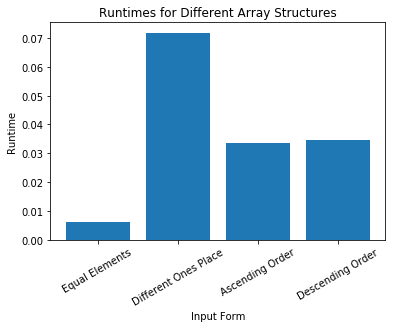

In [14]:
# labels for bar graph
label = ['Equal Elements','Different Ones Place','Ascending Order','Descending Order']
index = np.arange(len(label))

# bar graph
plt.bar(index, means)
plt.xlabel('Input Form')
plt.ylabel('Runtime')
plt.xticks(index, label, rotation=30)
plt.title('Runtimes for Different Array Structures')
plt.show()